<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


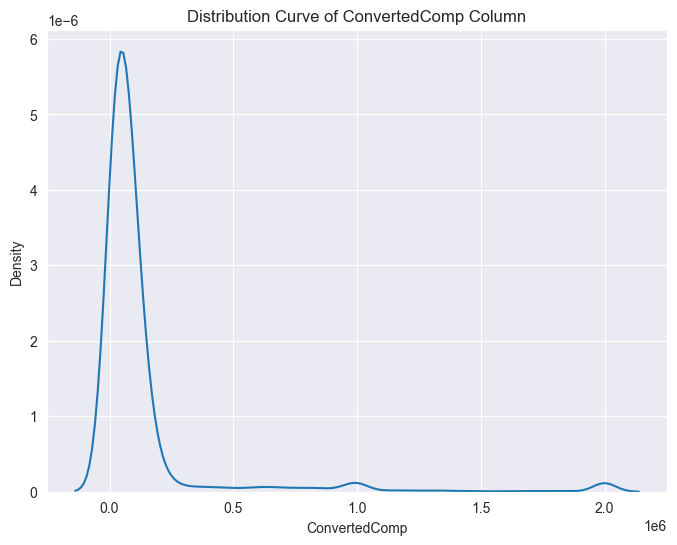

In [3]:
sns.set_style(style="darkgrid")
plt.figure(figsize=(8,6))
sns.kdeplot(data=df, x="ConvertedComp")
plt.title("Distribution Curve of ConvertedComp Column")
plt.show()

Plot the histogram for the column `ConvertedComp`.


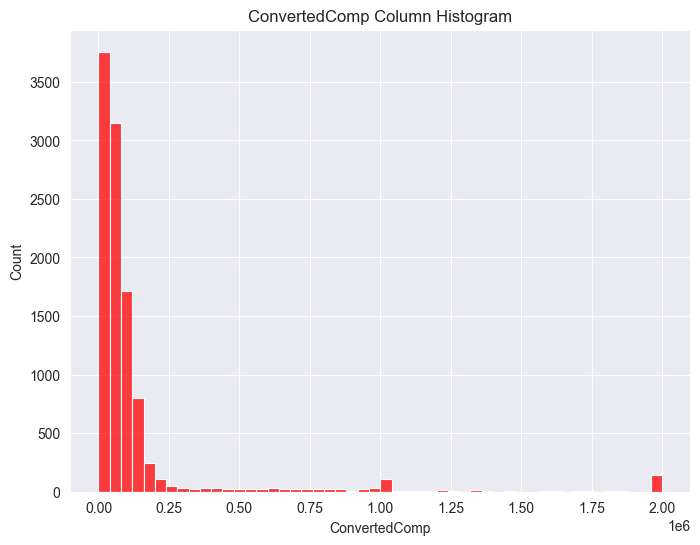

In [4]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x="ConvertedComp", bins=50, color="red")
plt.title("ConvertedComp Column Histogram")
plt.show()

What is the median of the column `ConvertedComp`?


In [5]:
print("The median of the 'ConvertedComp' column is:", df["ConvertedComp"].median())

The median of the 'ConvertedComp' column is: 57745.0


How many responders identified themselves only as a **Man**?


In [6]:
df_man = df[df["Gender"]=="Man"]
print("There were", len(df_man), "responders who identified themselves as a man.")

There were 10480 responders who identified themselves as a man.


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [7]:
df_woman = df[df["Gender"]=="Woman"]
print("The median of those respondents who identified themselves as a woman is:", df_woman["ConvertedComp"].median())

The median of those respondents who identified themselves as a woman is: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [8]:
df["Age"].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


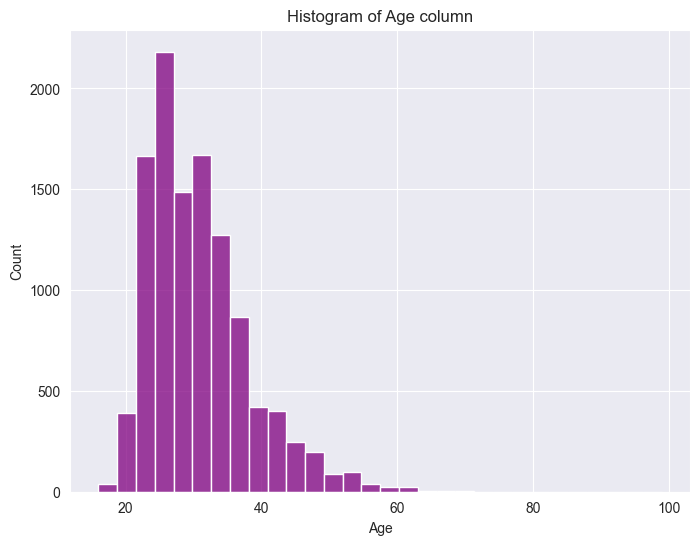

In [9]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x="Age", bins=30, color="purple")
plt.title("Histogram of Age column")
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


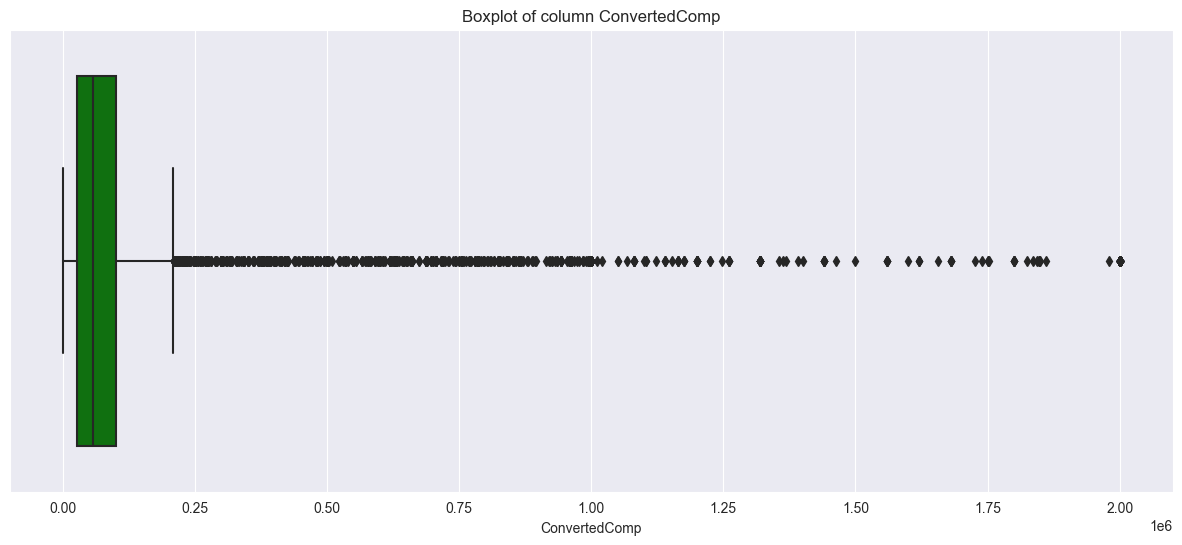

In [10]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x="ConvertedComp", color="green")
plt.title("Boxplot of column ConvertedComp")
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [11]:
q1 = df["ConvertedComp"].quantile(0.25)
q3 = df["ConvertedComp"].quantile(0.75)
IQR = q3-q1
print("The 1st Quantile is:", q1)
print("The 3rd Quantile is:", q3)
print("The IQR is:", IQR)


The 1st Quantile is: 26868.0
The 3rd Quantile is: 100000.0
The IQR is: 73132.0


Find out the upper and lower bounds.


In [12]:
upper_bound = q3 + IQR*1.5
lower_bound = q1 - IQR*1.5

print("The upper bound is:", upper_bound)
print("The lower_bound is:", lower_bound)

The upper bound is: 209698.0
The lower_bound is: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [13]:
outliers = 0
for value in df["ConvertedComp"]:
    if (value > upper_bound) or (value < lower_bound):
        outliers = outliers + 1
print("The total number of outliers in the column ConvertedComp are:", outliers)

The total number of outliers in the column ConvertedComp are: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [14]:
outlier_index = df[(df.ConvertedComp>upper_bound) | (df.ConvertedComp<lower_bound)].index
df_new = df.drop(outlier_index)
print("The original dataframe had:", len(df), "rows.")
print("After removing the outliers, the new dataframe has:", len(df_new), "rows.")
print("The number of removed rows was:", len(df) - len(df_new))
print("The number of outliers we found in the ConvertedComp column was:", outliers)

The original dataframe had: 11398 rows.
After removing the outliers, the new dataframe has: 10519 rows.
The number of removed rows was: 879
The number of outliers we found in the ConvertedComp column was: 879


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [15]:
df_numeric = df.select_dtypes(include=np.number)
print("The perason r correlation coefficients of column Age with all other numerical columns, are:")
df_numeric.corr()["Age"].sort_values()

The perason r correlation coefficients of column Age with all other numerical columns, are:


CodeRevHrs      -0.020469
Respondent       0.004041
CompTotal        0.006970
WorkWeekHrs      0.036518
ConvertedComp    0.105386
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
